# DAT210x - Programming with Python for DS

## Module4- Lab1

In this assignment, you're going to experiment with a real life armadillo sculpture scanned using a Cyberware 3030 MS 3D scanner at Stanford University. The sculpture is available as part of their 3D Scanning Repository, and is a very dense 3D mesh consisting of 172974 vertices! The mesh is available for you, located at /Module4/Datasets/stanford_armadillo.ply in the course github repository. It is not a Python script file, so don't attempt to load it with a text editor!

Start up Jupyter and open up the Module4/Module4 - Lab1.ipynb starter code in your browser, then read through it carefully. You will notice the use of a new library, Plyfile. This library loads up the 3D binary mesh for you. The mesh is further converted into a Pandas dataframe for your ease of manipulation.

Before changing any of the code, go ahead and just run through the notebook. You should see the 3D armadillo being rendered. It might take a while, considering its resolution. Your goal is to reduce its dimensionality from three to two using PCA to cast a shadow of the data onto its two most significant principal components. Then render the resulting 2D scatter plot. All of the detailed steps needed to accomplish this are listed inside of the notebook.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [10]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [11]:
reduce_factor = 100

Load up the scanned armadillo:

In [12]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [16]:
armadillo.values

array([[ 27.28324  ,   5.8945775,  11.788401 ],
       [-56.153477 , -54.86669  ,  66.67713  ],
       [-55.619434 , -55.855236 ,  67.53476  ],
       ...,
       [ 34.834377 ,  -2.2529645,  43.520943 ],
       [  4.457411 , -47.241844 , -48.912315 ],
       [-29.477325 ,  52.65868  ,  85.0956   ]], dtype=float32)

In [21]:
def do_PCA(armadillo, svd_solver):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, svd_solver=svd_solver)
    return pca.fit_transform(armadillo.values)

### Preview the Data

<IPython.core.display.Javascript object>


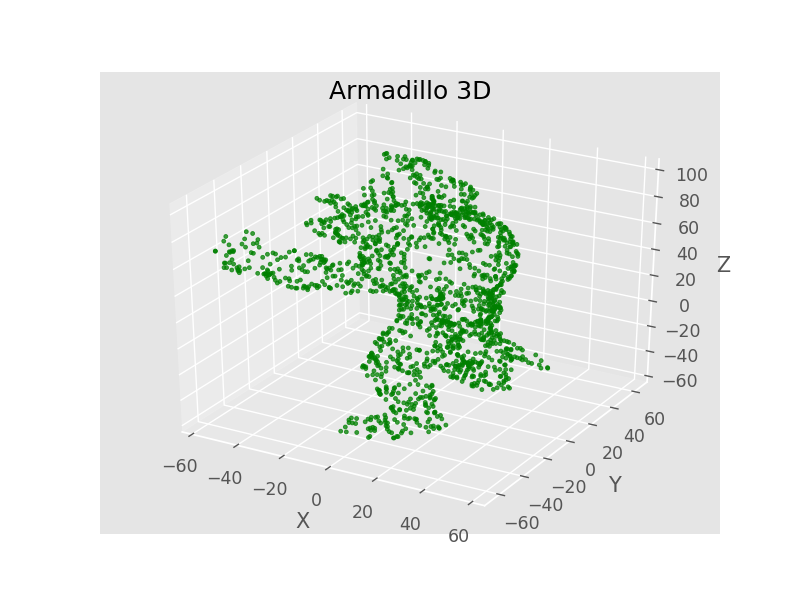

In [14]:
# Render the Original Armadillo
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [32]:
%timeit pca = do_PCA(armadillo, 'full')
pca = do_PCA(armadillo, 'full')
pca.shape

299 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


(1730, 2)

Render the newly transformed PCA armadillo!

In [27]:
pca

array([[ 23.425716  , -11.34514281],
       [-45.77840237,  62.6568348 ],
       [-46.38782551,  63.60486895],
       ...,
       [ -4.55717278,  -2.76426412],
       [ 80.42534909,  41.38446757],
       [-65.49719012, -46.46272106]])

<IPython.core.display.Javascript object>


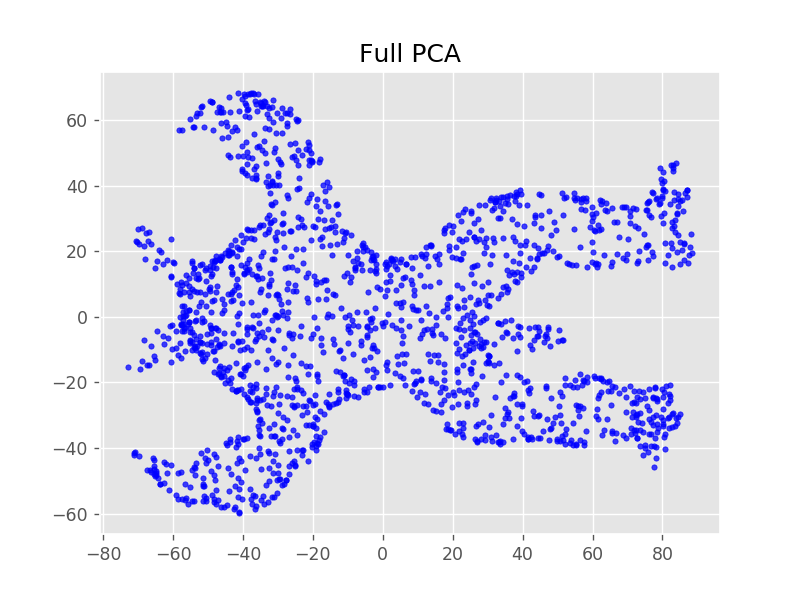

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [31]:
%timeit rpca = do_PCA(armadillo, 'randomized')
rpca = do_PCA(armadillo, 'randomized')
rpca

1.12 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array([[ 23.425716  , -11.34514281],
       [-45.77840237,  62.6568348 ],
       [-46.38782551,  63.60486895],
       ...,
       [ -4.55717278,  -2.76426412],
       [ 80.42534909,  41.38446757],
       [-65.49719012, -46.46272106]])

Let's see what the results look like:

<IPython.core.display.Javascript object>


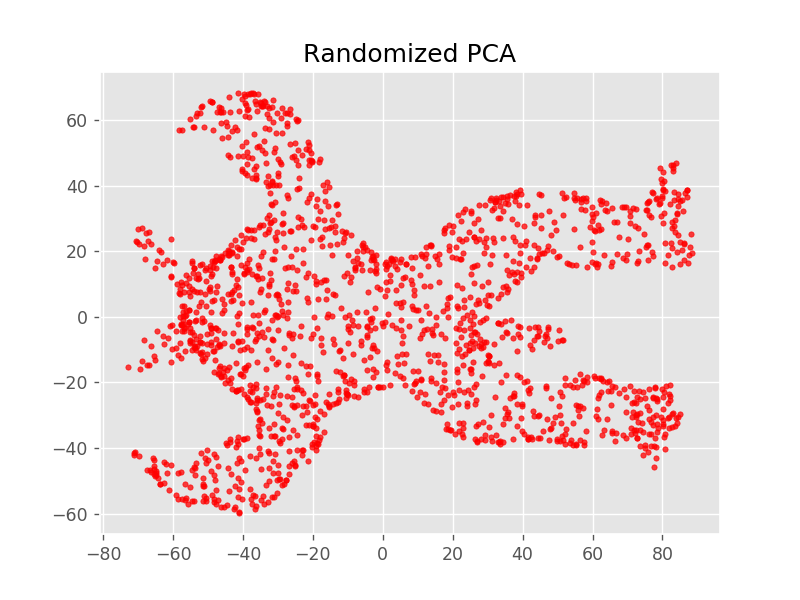

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
plt.show()